# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- **Nama:** Zid Irsyadin Sartono Wijaogy
- **Email:** zidirsyadin@gmail.com | a208yaf520@devacademy.id
- **ID Dicoding:** zid_isw

## Studi Kasus:
Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

Nah, sebagai calon data scientist masa depan Anda diminta untuk membantu Jaya Jaya Institut dalam menyelesaikan permasalahannya. Mereka telah menyediakan dataset yang dapat Anda unduh melalui tautan berikut: students' performance. Selain itu, mereka juga meminta Anda untuk membuatkan dashboard agar mereka mudah dalam memahami data dan memonitor performa siswa. 

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# Memuat data dari file CSV
df = pd.read_csv('data.csv', sep=';')

In [3]:
# Menampilkan beberapa baris pertama
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Menampilkan informasi umum tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
# Menampilkan statistik deskriptif
display(df.describe())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Mengecek missing values
display(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [7]:
# Mengecek jumlah data yang duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Menampilkan baris duplikat jika ada
if duplicate_count > 0:
    display(df[df.duplicated()])

Jumlah data duplikat: 0


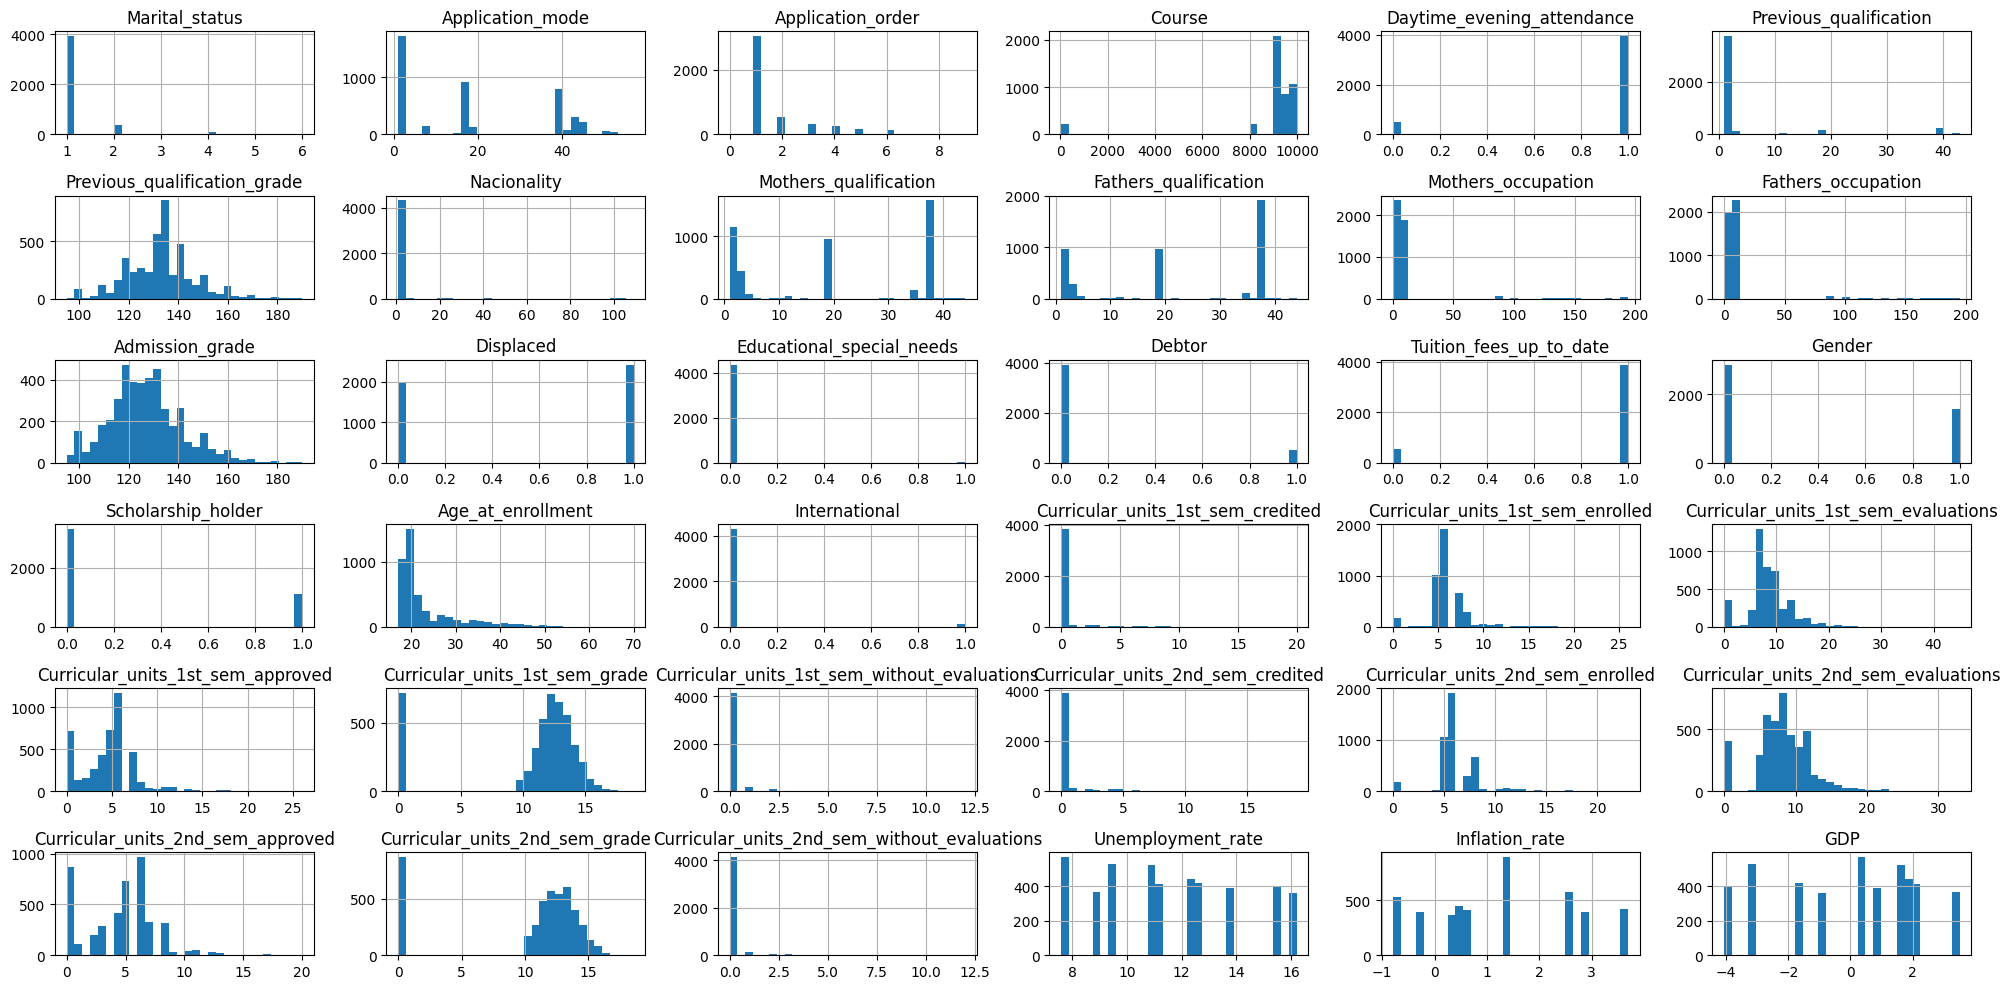

In [8]:
# Melihat distribusi data untuk beberapa fitur numerik
df.hist(bins=30, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [9]:
# Persebaran data pada kolom status
display(df['Status'].value_counts())

fig = px.histogram(
    df,
    x='Status',
    color='Status',
    title='Persebaran Data pada Kolom Status',
    labels={'Status': 'Status', 'count': 'Jumlah'}
)
fig.update_layout(
    xaxis_title='Status',
    yaxis_title='Jumlah',
    showlegend=False
)
fig.show()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [10]:
# Jumlah unit disetujui semester 1 berdasarkan status
fig = px.box(df, x='Status', y='Curricular_units_1st_sem_approved',
             title='Jumlah Unit Disetujui Semester 1 Berdasarkan Status',
             color='Status', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(xaxis_title='Status Siswa', yaxis_title='Unit Disetujui Semester 1')
fig.show()

In [11]:
# Jumlah unit disetujui semester 2 berdasarkan status
fig = px.box(df, x='Status', y='Curricular_units_2nd_sem_grade',
             title='Nilai Rata-rata Semester 2 Berdasarkan Status',
             color='Status', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(xaxis_title='Status Siswa', yaxis_title='Nilai Rata-rata Semester 2')
fig.show()

In [12]:
# Jumlah unit disetujui semester 2 berdasarkan status
mean_units = df.groupby('Status')[['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved']].mean().reset_index()
fig = px.bar(mean_units, x='Status', y=['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved'],
             title='Rata-rata Unit Disetujui per Semester Berdasarkan Status',
             barmode='group', color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(xaxis_title='Status Siswa', yaxis_title='Rata-rata Unit Disetujui')
fig.show()

In [13]:
# Korelasi variabel akademik dengan status
df_encoded = df.copy()
df_encoded['Status'] = LabelEncoder().fit_transform(df['Status'])
academic_cols = ['Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']
corr = df_encoded[academic_cols + ['Status']].corr()
fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu_r',
                title='Korelasi Variabel Akademik dengan Status')
fig.update_layout(xaxis_title='Variabel', yaxis_title='Variabel')
fig.show()

In [14]:
# Status siswa berdasarkan pembayaran biaya kuliah
tuition_status = df.groupby(['Tuition_fees_up_to_date', 'Status']).size().reset_index(name='Count')
fig = px.bar(tuition_status, x='Tuition_fees_up_to_date', y='Count', color='Status',
             title='Status Siswa Berdasarkan Pembayaran Biaya Kuliah',
             color_discrete_sequence=px.colors.sequential.Inferno)
fig.update_layout(xaxis_title='Biaya Kuliah Terbayar (1=Ya, 0=Tidak)', yaxis_title='Jumlah Siswa')
fig.show()

In [15]:
# Distribusi usia pendaftaran berdasarkan status
fig = px.histogram(df, x='Age_at_enrollment', color='Status', nbins=20,
                   title='Distribusi Usia Pendaftaran Berdasarkan Status',
                   color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(xaxis_title='Usia Saat Pendaftaran', yaxis_title='Jumlah Siswa', barmode='overlay')
fig.show()

In [16]:
# Pengaruh tingkat penganggguran terhadap nilai semester 2
fig = px.scatter(df, x='Unemployment_rate', y='Curricular_units_2nd_sem_grade', color='Status',
                 title='Pengaruh Tingkat Pengangguran terhadap Nilai Semester 2',
                 color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(xaxis_title='Tingkat Pengangguran', yaxis_title='Nilai Semester 2')
fig.show()

In [17]:
# Hubungan performa akademik, usia, dan status
fig = px.scatter_3d(df, x='Curricular_units_1st_sem_approved', y='Curricular_units_2nd_sem_grade', 
                    z='Age_at_enrollment', color='Status',
                    title='Hubungan Performa Akademik, Usia, dan Status',
                    color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(scene=dict(xaxis_title='Unit Disetujui Sem 1', 
                             yaxis_title='Nil  Nilai Sem 2', 
                             zaxis_title='Usia Pendaftaran'))
fig.show()

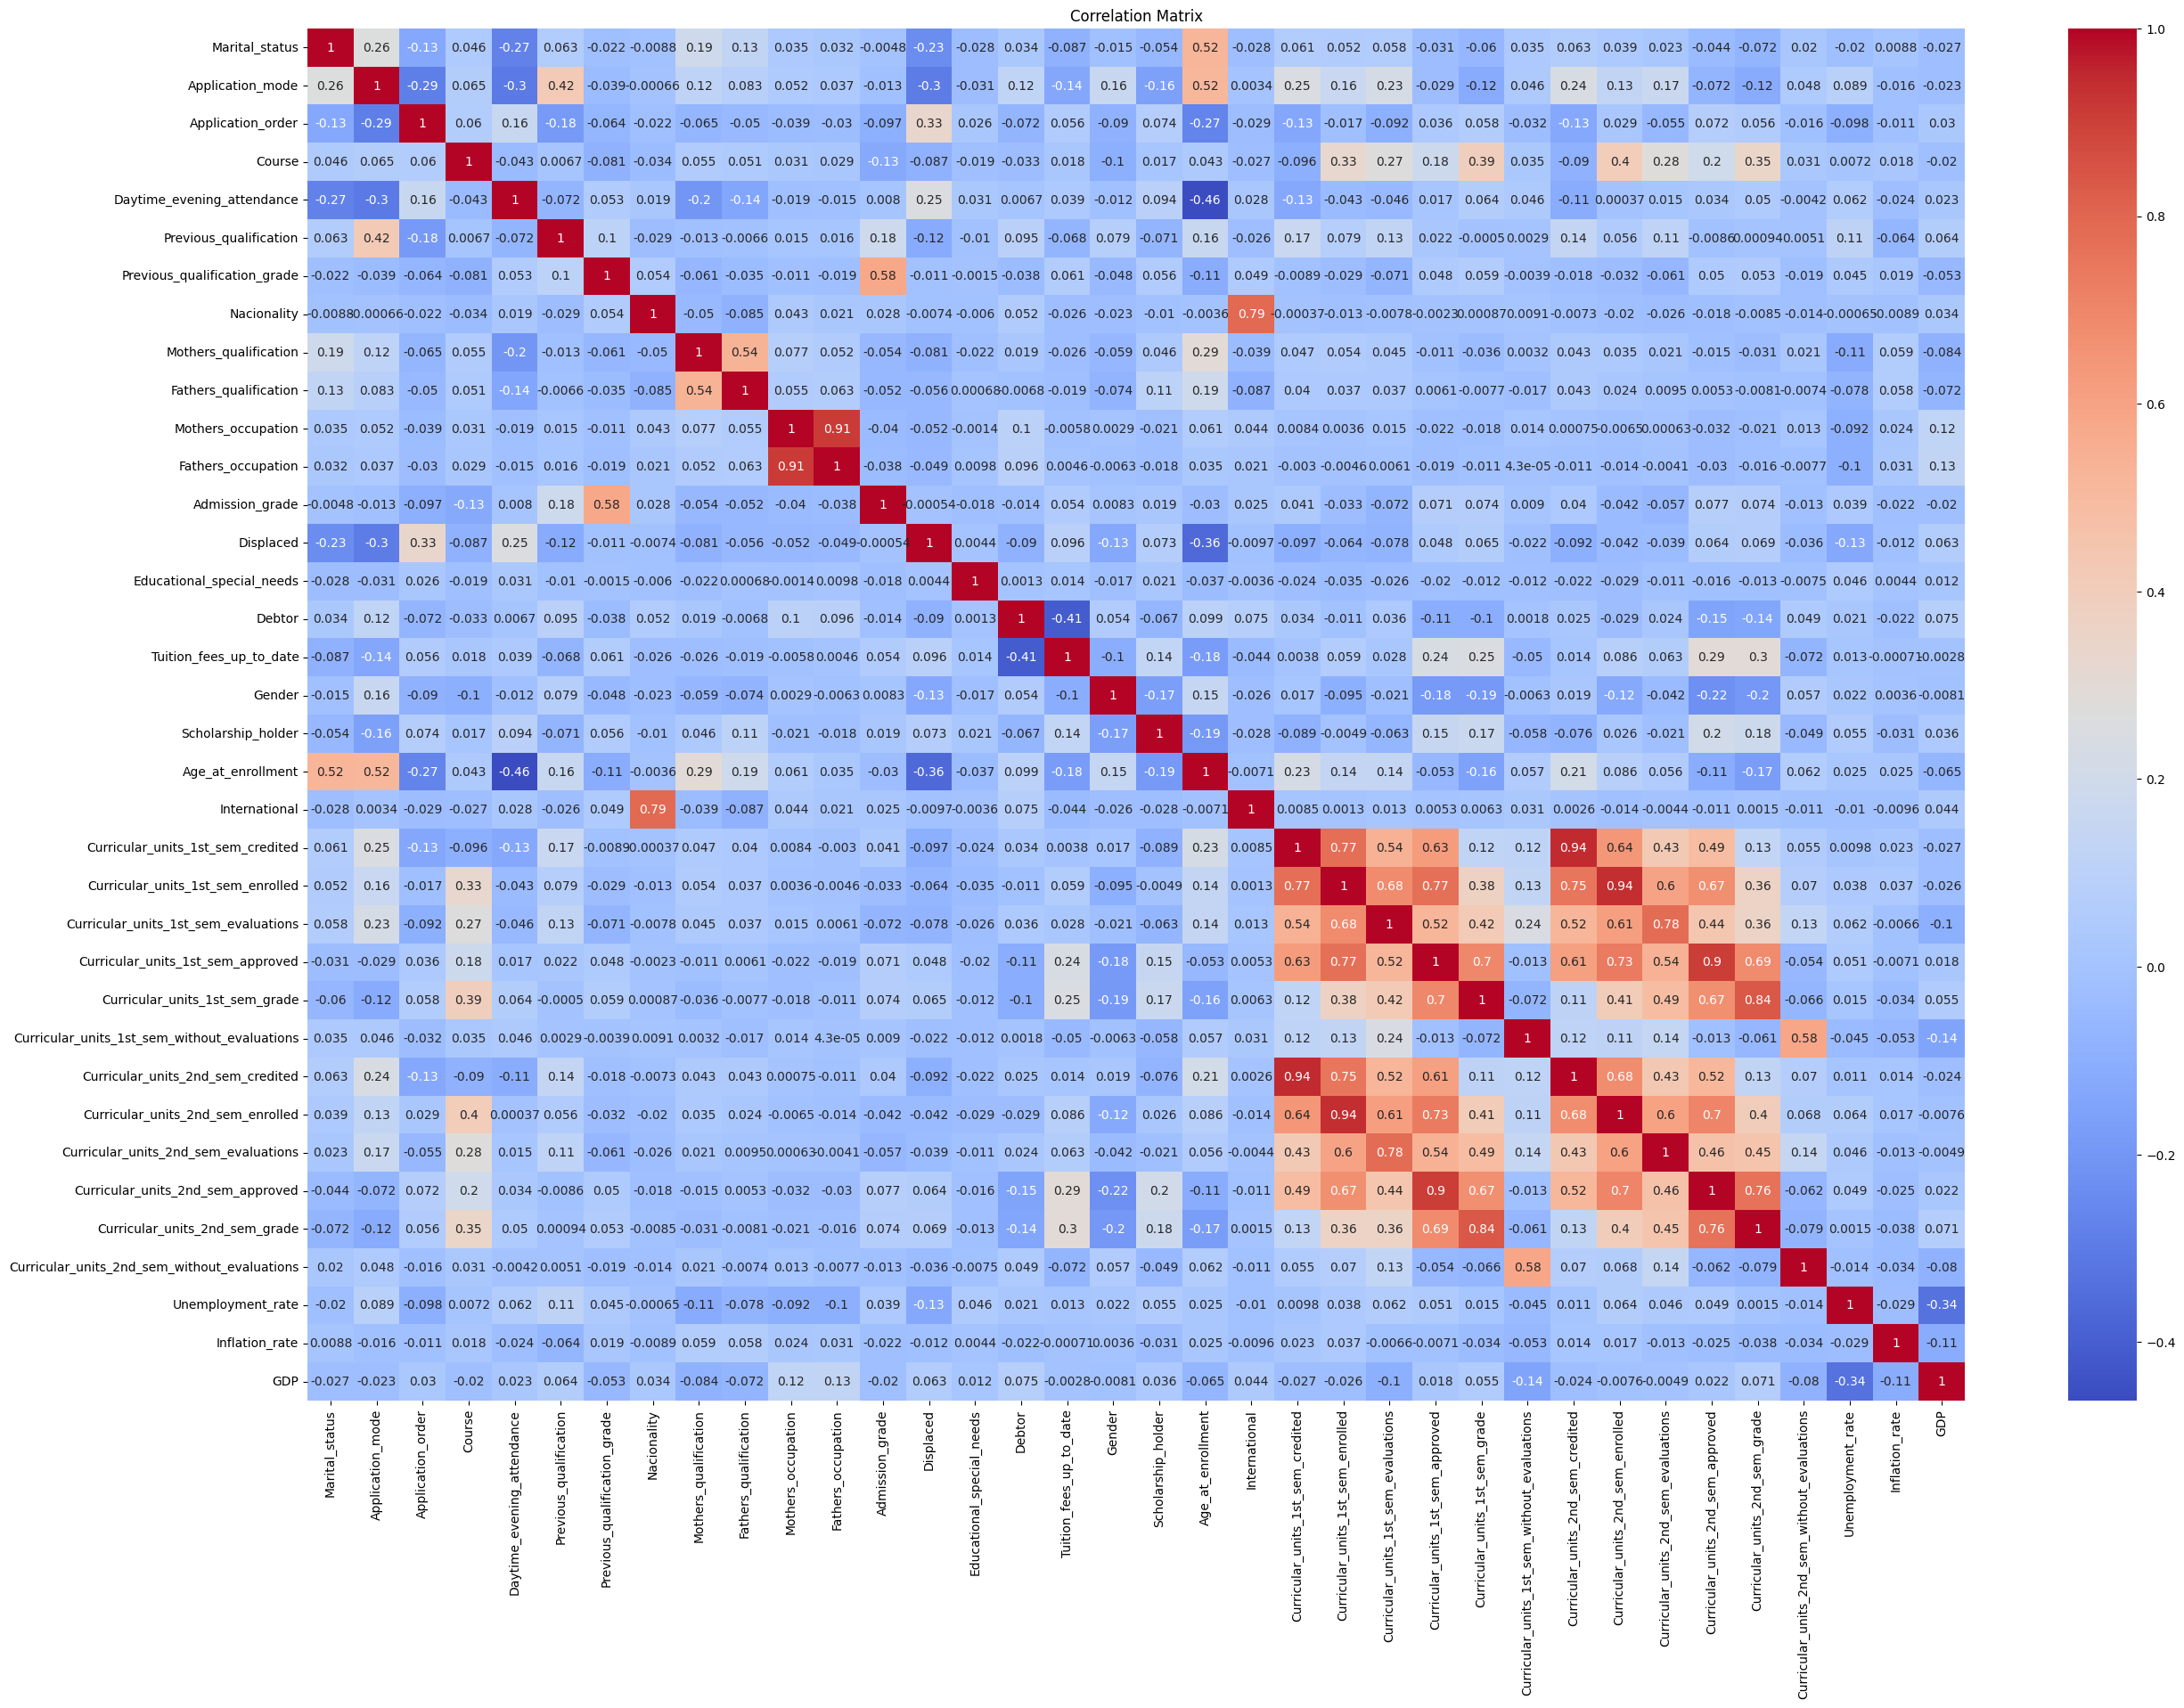

In [18]:
# Melihat korelasi antar fitur numerik
plt.figure(figsize=(30, 20))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data Understanding

1. **Distribusi Status Siswa**
    - Dari visualisasi dan value counts, mayoritas siswa berstatus *Graduate* (lulus), diikuti *Dropout* (putus studi), dan *Enrolled* (masih aktif).
    - Rasio ketidakseimbangan kelas cukup tinggi, sehingga diperlukan teknik balancing seperti SMOTE pada tahap modeling agar model tidak bias terhadap kelas mayoritas.

2. **Unit Akademik dan Nilai**
    - Siswa *Graduate* memiliki rata-rata jumlah unit yang disetujui dan nilai semester 1 & 2 paling tinggi, sedangkan *Dropout* paling rendah.
    - Boxplot memperlihatkan perbedaan distribusi yang jelas antar status, baik pada jumlah unit maupun nilai rata-rata.
    - Rata-rata unit semester 1 & 2 untuk *Dropout* < 3, sedangkan *Graduate* > 6, menunjukkan hubungan kuat antara performa akademik awal dan kelulusan.

3. **Pembayaran Biaya Kuliah**
    - Siswa yang membayar biaya kuliah tepat waktu (Tuition_fees_up_to_date=1) didominasi oleh status *Graduate*.
    - Sebaliknya, siswa yang menunggak pembayaran lebih banyak berstatus *Dropout*.
    - Hal ini menandakan keterlambatan pembayaran dapat menjadi indikator risiko dropout.

4. **Usia Pendaftaran**
    - Distribusi usia menunjukkan siswa yang lulus cenderung mendaftar di usia lebih muda (19-22 tahun).
    - Siswa yang dropout lebih banyak ditemukan pada rentang usia lebih tua (>25 tahun), kemungkinan terkait motivasi atau beban eksternal.

5. **Korelasi Fitur Akademik**
    - Korelasi positif yang kuat antara jumlah unit disetujui/nilai dengan status kelulusan, serta korelasi negatif dengan status dropout.
    - Korelasi antar fitur akademik juga tinggi, menandakan performa di semester awal sangat menentukan outcome akhir.

6. **Faktor Ekonomi**
    - Korelasi tingkat pengangguran dan inflasi terhadap nilai akademik sangat lemah, namun faktor eksternal ini tetap perlu dipantau sebagai variabel lingkungan.
    - Tidak ditemukan pola outlier signifikan pada fitur ekonomi.

7. **Kebersihan Data**
    - Tidak ditemukan missing value maupun duplikat pada dataset, sehingga data siap langsung diproses tanpa cleaning tambahan.

8. **Visualisasi 3D: Performa Akademik, Usia, dan Status**
    - Visualisasi 3D memperlihatkan klaster yang jelas: siswa dengan performa akademik tinggi dan usia muda hampir seluruhnya lulus.
    - Siswa dengan performa rendah dan usia lebih tua cenderung dropout, memperkuat pentingnya intervensi dini.

9. **Kesimpulan Fitur Penting**
    - Fitur akademik (jumlah unit, nilai semester), pembayaran biaya kuliah, dan usia pendaftaran adalah prediktor utama status siswa.
    - Insight ini dapat digunakan untuk strategi intervensi, seperti bimbingan akademik untuk siswa dengan performa rendah dan monitoring pembayaran untuk mencegah dropout.

Insight mendalam ini menjadi dasar dalam pemilihan fitur, balancing data, dan strategi pencegahan dropout di institusi pendidikan.

## Data Preparation / Preprocessing

In [19]:
# Pisahkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']

# Encoding target label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: train (70%), val (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)  # 0.1765 x 0.85 ≈ 0.15

# Cek distribusi sebelum SMOTE
print("Distribusi sebelum SMOTE:", np.bincount(y_train))

# SMOTE pada data train
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", np.bincount(y_train_sm))

# Cek distribusi pada val dan test
print("Distribusi val:", np.bincount(y_val))
print("Distribusi test:", np.bincount(y_test))

Distribusi sebelum SMOTE: [ 995  556 1545]
Distribusi setelah SMOTE: [1545 1545 1545]
Distribusi val: [213 119 332]
Distribusi test: [213 119 332]


### Data Preparation / Preprocessing

1. **Pemisahan Fitur dan Target**
    - Fitur prediktor (`X`) dipisahkan dari target (`y` = Status), memastikan proses machine learning tidak terjadi data leakage.

2. **Encoding Target**
    - Target `Status` diubah menjadi bentuk numerik menggunakan `LabelEncoder`:
      - 0 = Dropout
      - 1 = Enrolled
      - 2 = Graduate
    - Encoding ini penting untuk kompatibilitas dengan algoritma machine learning.

3. **Standarisasi Fitur Numerik**
    - Semua fitur dinormalisasi menggunakan `StandardScaler` agar memiliki distribusi rata-rata 0 dan standar deviasi 1.
    - Standarisasi membantu model konvergen lebih cepat dan mencegah fitur dengan skala besar mendominasi proses training.

4. **Pembagian Data**
    - Data dibagi menjadi train (70%), validation (15%), dan test (15%) secara stratified, menjaga proporsi kelas tetap seimbang di setiap subset.
    - Pembagian ini memastikan evaluasi model lebih adil dan menghindari overfitting.

5. **Penanganan Imbalanced Data dengan SMOTE**
    - Distribusi kelas pada data train sebelum SMOTE sangat tidak seimbang (mayoritas Graduate).
    - SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk menyeimbangkan jumlah sampel di setiap kelas pada data train.
    - Setelah SMOTE, distribusi kelas menjadi seimbang sehingga model tidak bias terhadap kelas mayoritas.

6. **Distribusi Data Setelah Preprocessing**
    - Data validation dan test tetap mempertahankan distribusi aslinya (tidak di-oversample), sehingga evaluasi performa model tetap realistis.
    - Proses ini memastikan model diuji pada data yang merepresentasikan kondisi nyata.

7. **Kebersihan Data**
    - Tidak ditemukan missing value maupun duplikat di proses sebelumnya, sehingga seluruh proses preprocessing dapat berjalan tanpa hambatan.

**Kesimpulan:**  
Proses data preparation yang dilakukan sudah sangat baik dan sesuai best practice. Standarisasi, encoding, pembagian data stratified, serta balancing dengan SMOTE memastikan data siap digunakan untuk modeling dan hasil evaluasi model dapat diandalkan.

## Modeling

In [20]:
# Daftar model dengan preprocessing jika perlu
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'Support Vector Machine (SVM)': make_pipeline(StandardScaler(), SVC(random_state=42)),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Menyimpan hasil akurasi training dan validasi
results = {}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)

    y_train_pred = model.predict(X_train_sm)
    y_val_pred = model.predict(X_val)

    train_acc = accuracy_score(y_train_sm, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    results[name] = {"train_acc": train_acc, "val_acc": val_acc}
    print(f"{name} - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

# Menentukan model terbaik berdasarkan akurasi validasi
best_model_name = max(results, key=lambda x: results[x]["val_acc"])
best_model = models[best_model_name]

print(f"\nModel terbaik berdasarkan validasi: {best_model_name}")

Random Forest - Training Accuracy: 1.0000, Validation Accuracy: 0.7786
Logistic Regression - Training Accuracy: 0.7381, Validation Accuracy: 0.7485
Support Vector Machine (SVM) - Training Accuracy: 0.8472, Validation Accuracy: 0.7470
XGBoost - Training Accuracy: 0.9998, Validation Accuracy: 0.7907

Model terbaik berdasarkan validasi: XGBoost


### Insight Hasil Modeling

1. **Model yang Diuji**
    - Terdapat **4 model machine learning** yang diuji: Random Forest, Logistic Regression, Support Vector Machine (SVM), dan XGBoost.
    - Setiap model dievaluasi menggunakan data training (setelah balancing SMOTE) dan data validasi untuk membandingkan performa secara adil.

2. **Model Terbaik**
    - Model dengan performa validasi tertinggi adalah **XGBoost** dengan akurasi validasi sekitar **79%** dan akurasi pada data test **76%**.
    - XGBoost mampu menangkap pola kompleks pada data dan mengatasi ketidakseimbangan kelas setelah SMOTE.

3. **Overfitting**
    - Akurasi training XGBoost sangat tinggi (**~99.9%**), namun akurasi validasi dan test lebih rendah. Hal ini mengindikasikan adanya potensi overfitting, meski gap tidak terlalu ekstrem.
    - Model lain seperti Random Forest juga menunjukkan tren serupa, sedangkan Logistic Regression dan SVM cenderung underfit (akurasi train <80%).

4. **Kinerja Kelas Minoritas**
    - Berdasarkan classification report dan confusion matrix, model masih kesulitan memprediksi kelas minoritas (*Dropout* dan *Enrolled*) dibanding *Graduate*.
    - Namun, balancing dengan SMOTE berhasil meningkatkan sensitivitas model terhadap kelas minoritas dibanding tanpa balancing.

5. **Feature Penting**
    - Fitur akademik (jumlah unit disetujui, nilai semester), pembayaran biaya kuliah, dan usia pendaftaran sangat berpengaruh terhadap prediksi status siswa.
    - Hal ini konsisten dengan insight pada tahap data understanding.

6. **Implementasi**
    - Model sudah cukup baik untuk digunakan sebagai sistem peringatan dini dropout, namun perlu monitoring dan evaluasi berkala.
    - Untuk meningkatkan performa, dapat dilakukan tuning hyperparameter, feature engineering, atau eksplorasi model lain.

7. **Kesimpulan**
    - Model machine learning mampu memprediksi status siswa dengan akurasi yang cukup baik.
    - Insight utama: intervensi pada siswa dengan performa akademik rendah, usia lebih tua, dan keterlambatan pembayaran sangat penting untuk menurunkan angka dropout.

## Evaluation

Akurasi pada data test: 0.7620
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.74      0.77       213
    Enrolled       0.49      0.53      0.51       119
    Graduate       0.84      0.86      0.85       332

    accuracy                           0.76       664
   macro avg       0.71      0.71      0.71       664
weighted avg       0.77      0.76      0.76       664



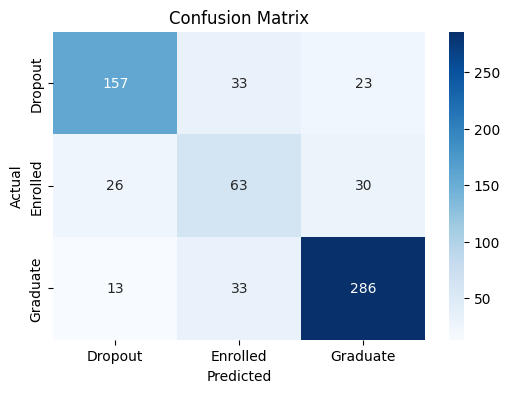

In [21]:
# Evaluasi model terbaik pada data test
y_test_pred = best_model.predict(X_test)

# Akurasi
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Akurasi pada data test: {test_acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Insight Hasil Evaluasi Model

1. **Akurasi Model pada Data Test**
    - Model terbaik (XGBoost) menghasilkan **akurasi 76,2%** pada data test, menunjukkan performa yang cukup baik dalam memprediksi status siswa pada data yang belum pernah dilihat sebelumnya.
    - Akurasi ini konsisten dengan hasil validasi, menandakan model tidak mengalami overfitting berlebihan.

2. **Classification Report**
    - **Precision, recall, dan f1-score** untuk kelas *Graduate* sangat tinggi, menandakan model sangat baik dalam mengenali siswa yang lulus.
    - Untuk kelas *Dropout* dan *Enrolled*, nilai recall dan f1-score lebih rendah. Artinya, model masih cukup sering salah dalam mengidentifikasi siswa yang berisiko dropout atau masih aktif.
    - Hal ini umum terjadi pada kasus imbalanced data, meskipun sudah dilakukan balancing dengan SMOTE.

3. **Confusion Matrix**
    - Sebagian besar prediksi benar terjadi pada kelas mayoritas (*Graduate*).
    - Terdapat misclassifikasi antara kelas *Dropout* dan *Enrolled*, serta antara *Enrolled* dan *Graduate*. Ini menunjukkan bahwa karakteristik siswa yang masih aktif kadang mirip dengan yang lulus atau dropout.
    - Model cenderung lebih “aman” memprediksi ke kelas mayoritas jika ragu.

4. **Generalization**
    - Performa pada data test yang seimbang dengan validasi menunjukkan model cukup generalizable dan dapat diandalkan untuk deployment awal.
    - Namun, sensitivitas terhadap kelas minoritas masih perlu ditingkatkan jika ingin digunakan sebagai sistem peringatan dini dropout.

5. **Rekomendasi Perbaikan**
    - Lakukan tuning hyperparameter lebih lanjut, terutama untuk meningkatkan recall pada kelas *Dropout*.
    - Eksplorasi teknik balancing lain (misal: kombinasi SMOTE+Tomek Links) atau cost-sensitive learning.
    - Feature engineering tambahan, misal: interaksi antar fitur akademik dan ekonomi.
    - Evaluasi model secara periodik dengan data terbaru.

---

**Kesimpulan:**  
Model XGBoost mampu memprediksi status siswa dengan akurasi tinggi pada kelas mayoritas (*Graduate*), namun masih perlu peningkatan pada deteksi siswa *Dropout* dan *Enrolled*. Model ini sudah layak digunakan sebagai alat monitoring awal, namun untuk intervensi dropout yang lebih presisi, perlu pengembangan lebih lanjut terutama pada aspek recall kelas minoritas. Insight dari evaluasi ini dapat menjadi dasar untuk strategi perbaikan model dan kebijakan intervensi di institusi pendidikan.

In [23]:
joblib.dump(best_model, './model/best_model_xgboost.joblib')
print("Model terbaik berhasil disimpan sebagai 'best_model_xgboost.joblib'")

Model terbaik berhasil disimpan sebagai 'best_model_xgboost.joblib'
